# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

The integral fluxes were calculated using a [STAYSL FIR Run](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/FIR).  Once the FIR run is created, the integral flux can be calculated from the code segment below and entered into the SigPhi Calculator.

In [3]:
from Unfolding.STAYSL import integralXSecEst

firPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/SigPhi_Calculator/FIR/'

integralXSecEst(firPath, numRx=6)

The epithermal/thermal ratio is: 171.509974734

AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137
AL27P
The > 0.1 flux weighted sigma is: 0.0219491979955
The > 1 flux weighted sigma is: 0.0219491979955
AL27A
The > 0.1 flux weighted sigma is: 0.0243749813843
The > 1 flux weighted sigma is: 0.0243749813843
NI582
The > 0.1 flux weighted sigma is: 0.00524730850596
The > 1 flux weighted sigma is: 0.00524730850596
IN115N
The > 0.1 flux weighted sigma is: 0.119558244971
The > 1 flux weighted sigma is: 0.112587699734
AU1972
The > 0.1 flux weighted sigma is: 0.386506230663
The > 1 flux weighted sigma is: 0.386506230663
AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137


## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [4]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

# PHS-to-staysl unfold
simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_tgt_test.o'
check_path(simPath)

(phsTallyFrame, tallyTot, uncertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(phsTallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_tgt_test.o
The flux:
 0.0000e+00 9.0084e-10 1.8432e-09 8.1116e-09 5.2994e-09 4.4603e-09 3.1217e-09 
 1.9405e-09 9.4679e-10 3.3791e-09 1.3089e-09 1.9936e-09 1.8240e-09 1.5556e-09 
 1.1843e-09 1.6143e-09 9.7600e-10 1.1556e-09 1.5489e-09 2.7306e-09 2.5393e-09 
 2.9348e-09 3.5367e-09 1.9472e-09 1.5764e-09 2.2245e-09 3.0207e-09 1.4163e-09 
 3.6466e-09 1.5276e-09 3.3927e-09 2.6490e-09 3.8301e-09 3.8392e-09 2.7758e-09 
 6.0742e-09 6.0316e-09 1.0630e-08 9.6931e-09 1.6762e-08 2.1290e-08 4.0553e-08 
 3.7070e-08 4.2351e-08 8.9306e-08 1.1886e-07 1.0409e-07 1.9589e-07 2.4164e-07 
 4.4826e-07 3.7613e-07 5.4987e-07 4.5631e-07 6.1133e-07 5.4930e-07 6.5483e-07 
 6.7346e-07 5.4871e-07 7.4768e-07 7.4107e-07 8.2668e-07 8.3748e-07 8.0129e-07 
 8.0906e-07 8.9493e-07 8.7480e-07 8.5364e-07 7.9667e-07 1.0128e-06 9.2967e-07 
 1.9972e-06 1.6245e-06 1.3301e-06 1.0994e-06 9.6726e-07 1.1647e-06

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [11]:
import pandas as pd
from DataAnalysis.DataManipulation import bin_integration, bin_differentiation

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)

df['adjFlux'] = bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low')
df['adjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low', True)
df['unadjFlux'] = bin_integration(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low')
df['unadjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low', True)

df['adjLethargyStd'] = df['adjStd'] * df['adjLethargy'] / 100
df['unadjLethargyStd'] = df['unadjStd'] * df['adjLethargy'] / 100
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert,adjLethargy,unadjLethargy,adjLethargyStd,unadjLethargyStd
2,1.000000e-09,15.734700,7.081200,2.222,4.570930,2.629250,0.782,312460.0000,0.92,6.833493,3.075326,1.985130,2.537276
3,1.000000e-08,23.764000,14.488500,1.640,2.968124,2.506510,0.722,312440.0000,0.92,28.531324,17.395055,3.563562,4.935919
4,2.300000e-08,104.206500,63.763200,1.634,10.597801,9.845038,0.659,312420.0000,0.92,134.195282,82.113118,13.647660,20.719752
5,5.000000e-08,73.468200,41.657200,1.764,7.486410,7.110884,0.597,312310.0000,0.92,175.463068,99.489304,17.879687,29.951546
6,7.600000e-08,60.598200,35.060610,1.728,5.035710,5.392322,0.540,312240.0000,0.92,146.302215,84.646819,12.157714,22.501281
7,1.150000e-07,51.048800,24.538250,2.080,5.589844,5.373877,0.500,312180.0000,0.92,130.604247,62.779138,14.301165,28.602330
8,1.700000e-07,36.735300,15.253250,2.408,4.977633,4.301417,0.481,312130.0000,0.92,90.600398,37.619143,12.276354,25.549312
9,2.550000e-07,17.585000,7.442375,2.363,2.368700,2.065259,0.485,312090.0000,0.92,44.082878,18.656884,5.937964,12.232999
10,3.800000e-07,83.611100,26.562500,3.148,19.473025,12.083281,0.512,312070.0000,0.92,226.130555,71.839658,52.665806,102.866789
11,5.500000e-07,21.712880,10.288910,2.110,3.024604,2.616470,0.548,311990.0000,0.92,51.272067,24.295887,7.142199,13.038487


Convert to Histograms.

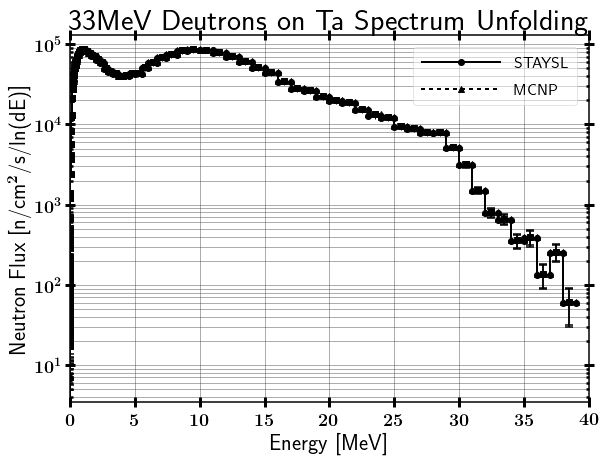

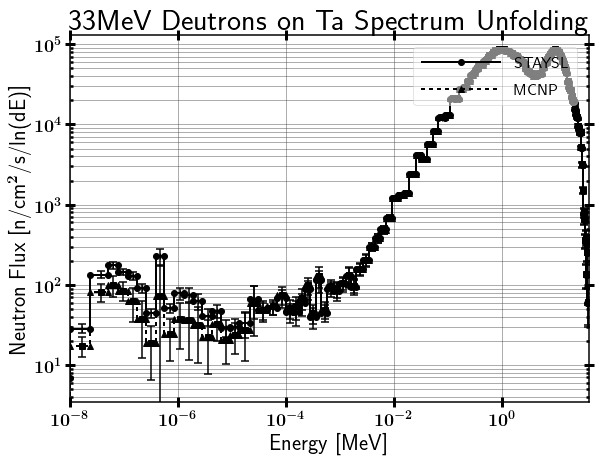

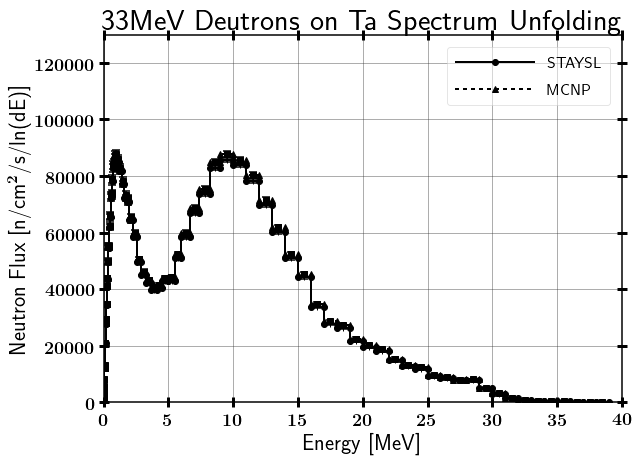

In [12]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjHisto = Histogram()
unadjHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjLethargyHisto = Histogram()
adjLethargyHisto.build_histo(df['lowE'].tolist(), df['adjLethargy'].tolist(), uncert=df['adjLethargyStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjLethargyHisto = Histogram()
unadjLethargyHisto.build_histo(df['lowE'].tolist(), df['unadjLethargy'].tolist(), uncert=df['unadjLethargyStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Lethargic_semilog')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-8, logX=True, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Lethargic_log')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-8, logX=False, logY=False,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Lethargic_lin')

Read in and store MCNP simulation results.

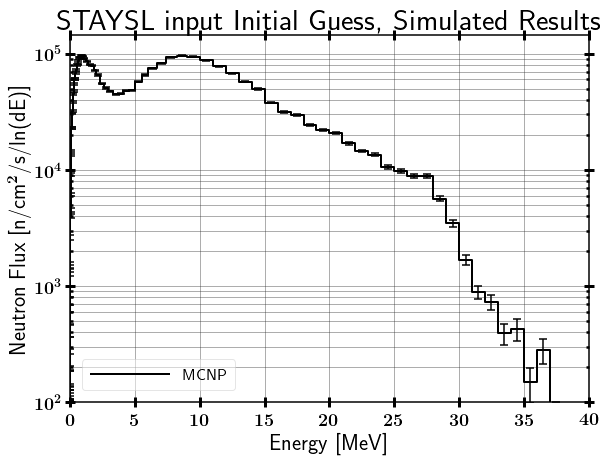

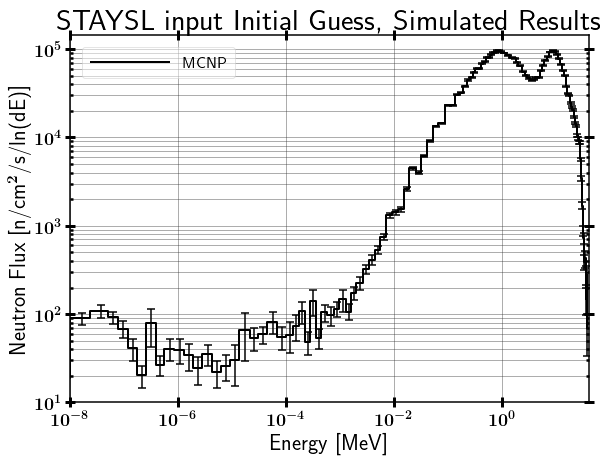

In [13]:
# PHS Input to STAYSL Beam Unfold
mcnpPhsHisto = Histogram()
normFactor = 5.37E9*3.43/2.149
phsTallyFrame['normTally'] = phsTallyFrame['tally'] * normFactor
phsTallyFrame['normUncertainty'] = phsTallyFrame['uncertainty'] * phsTallyFrame['normTally']
mcnpPhsHisto.build_histo(phsTallyFrame['bin'][:118].tolist(), phsTallyFrame['normTally'][1:119].tolist(), 
                         uncert=phsTallyFrame['normUncertainty'][1:119].tolist(), edgeLoc='up', name='MCNP')

phsTallyFrame['normDiff'] =  bin_differentiation(phsTallyFrame['bin'].tolist(),
                                                 phsTallyFrame['normTally'].tolist(), 'up', False)
phsTallyFrame['normDiffUncert'] = phsTallyFrame['uncertainty'] * phsTallyFrame['normDiff']
mcnpPhsDiffHisto = Histogram()
mcnpPhsDiffHisto.build_histo(phsTallyFrame['bin'][:118].tolist(), phsTallyFrame['normDiff'][1:119].tolist(), 
                             uncert=phsTallyFrame['normDiffUncert'][1:119].tolist(), edgeLoc='up', name='MCNP')

phsTallyFrame['normLethargy'] =  bin_differentiation(phsTallyFrame['bin'].tolist(),
                                                     phsTallyFrame['normTally'].tolist(), 'up', True)
phsTallyFrame['normLethargyUncert'] = phsTallyFrame['uncertainty'] * phsTallyFrame['normLethargy']
mcnpPhsLethargyHisto = Histogram()
mcnpPhsLethargyHisto.build_histo(phsTallyFrame['bin'][:118].tolist(), phsTallyFrame['normLethargy'][1:119].tolist(), 
                                 uncert=phsTallyFrame['normLethargyUncert'][1:119].tolist(), edgeLoc='up', name='MCNP')


mcnpPhsLethargyHisto.plot(xMin=1E-6, xMax=40, yMin=100, logX=False, logY=True, includeMarkers=False,
              title='STAYSL input Initial Guess, Simulated Results', legendLoc=3, color=['k'], 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_MCNP-comp_semilog')

mcnpPhsLethargyHisto.plot(xMin=1E-8, xMax=40, yMin=10, logX=True, logY=True, includeMarkers=False,
              title='STAYSL input Initial Guess, Simulated Results', legendLoc=2, color=['k'], 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_MCNP-comp_log')

Plot the normalized 33 MeV d Breakup source vs Modeled MCNP ETA results

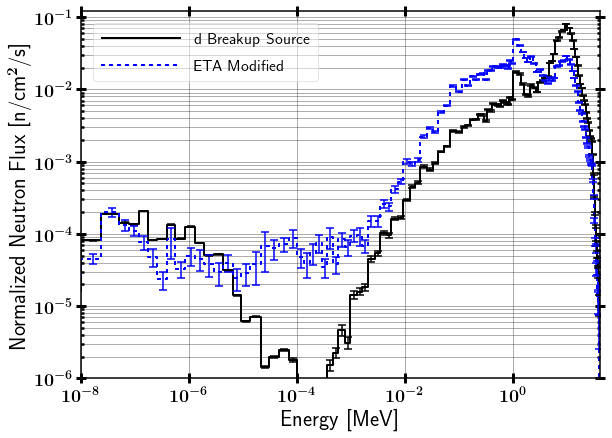

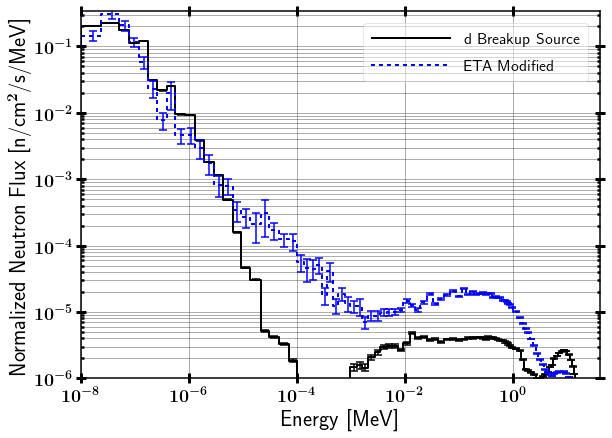

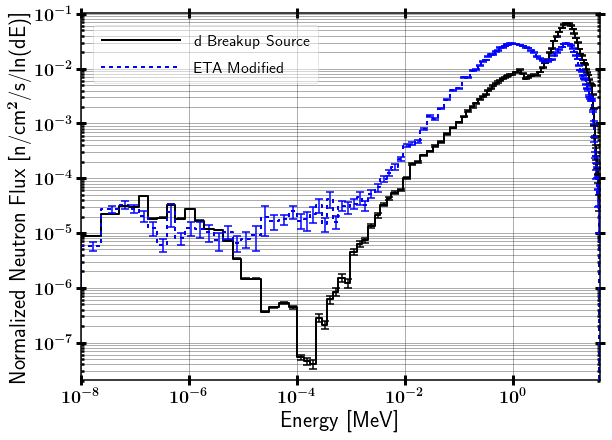

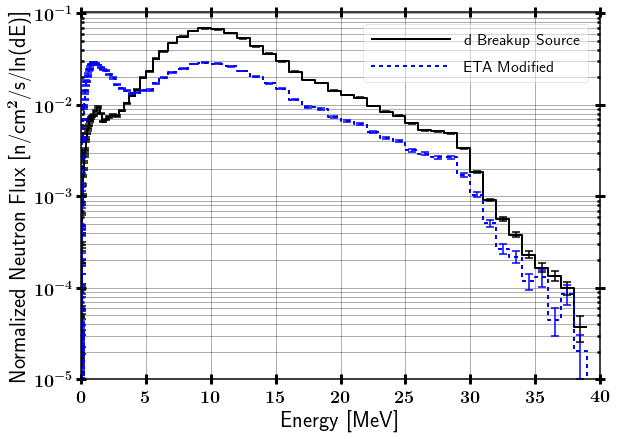

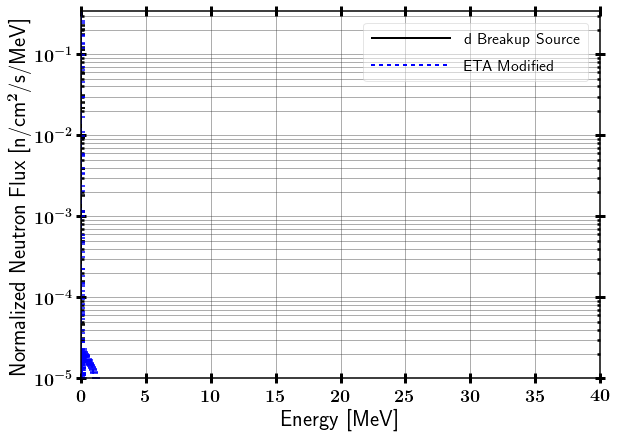

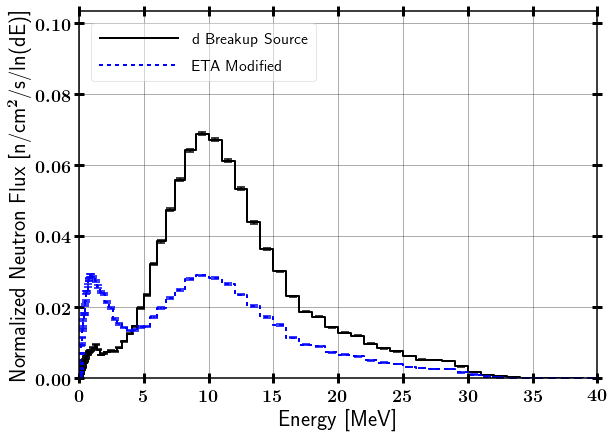

In [14]:
import numpy as np
import copy as cp

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration1/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=96, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)

beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['adjDiff'] =  bin_differentiation(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low', False)
beamDF['normAdjDiff'] = beamDF['adjDiff'] / sum(beamDF['adjDiff'])
beamDF['adjLethargy'] =  bin_differentiation(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low', True)
beamDF['normAdjLethargy'] = beamDF['adjLethargy'] / sum(beamDF['adjLethargy'])

beamDF['adjDiffStd'] = beamDF['adjStd'] * beamDF['adjDiff'] / 100
beamDF['normAdjDiffStd'] = beamDF['adjStd'] * beamDF['normAdjDiff'] / 100
beamDF['adjLethargyStd'] = beamDF['adjStd'] * beamDF['adjLethargy'] / 100
beamDF['normAdjLethargyStd'] = beamDF['adjStd'] * beamDF['normAdjLethargy'] / 100
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux'] / 100
beamDF['adjStd'] = beamDF['adjStd'] * beamDF['adjFlux'] / 100

# Create Beam Histos
beamNormHisto = Histogram()
beamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjFlux'].tolist(), 
                          uncert=beamDF['normAdjStd'].tolist(), edgeLoc='low',
                          name='d Breakup Source')

beamNormDiffHisto = Histogram()
beamNormDiffHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjDiff'].tolist(), 
                              uncert=beamDF['normAdjDiffStd'].tolist(), edgeLoc='low',
                              name='d Breakup Source')

beamNormLethargyHisto = Histogram()
beamNormLethargyHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjLethargy'].tolist(), 
                                  uncert=beamDF['normAdjLethargyStd'].tolist(), edgeLoc='low',
                                  name='d Breakup Source')

# Create Normalized MCNP histos
mcnpPhsNormHisto = Histogram()
normFactor = sum(phsTallyFrame['tally'])
mcnpPhsNormHisto.build_histo(phsTallyFrame['bin'].tolist(), (phsTallyFrame['tally']/(normFactor)).tolist(), 
                             uncert=(phsTallyFrame['uncertainty']*phsTallyFrame['tally']/(normFactor)).tolist(), 
                             edgeLoc='up', name='ETA Modified')

mcnpPhsNormDiffHisto = Histogram()
normFactor = sum(phsTallyFrame.iloc[1:]['normDiff'])
mcnpPhsNormDiffHisto.build_histo(phsTallyFrame['bin'].tolist(), (phsTallyFrame.iloc[1:]['normDiff']/(normFactor)).tolist(), 
                                 uncert=(phsTallyFrame.iloc[1:]['uncertainty']*phsTallyFrame.iloc[1:]['normDiff']/(normFactor)).tolist(), 
                                 edgeLoc='up', name='ETA Modified')

mcnpPhsNormLethargyHisto = Histogram()
normFactor = sum(phsTallyFrame['normLethargy'])
mcnpPhsNormLethargyHisto.build_histo(phsTallyFrame['bin'].tolist(), (phsTallyFrame['normLethargy']/(normFactor)).tolist(), 
                                     uncert=(phsTallyFrame['uncertainty']*phsTallyFrame['normLethargy']/(normFactor)).tolist(), 
                                     edgeLoc='up', name='ETA Modified')


beamNormHisto.plot(mcnpPhsNormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True,
                   includeMarkers=False, title='', legendLoc=2, color=['k','b'], 
                   xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s]',
                   savePath=outpath+'33MeVTa_MCNP_NormComp_log')

beamNormDiffHisto.plot(mcnpPhsNormDiffHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, legendLoc=1,
                       includeMarkers=False, title='', color=['k','b'], 
                       xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/MeV]',
                       savePath=outpath+'33MeVTa_MCNP_NormDiffComp_log')

beamNormLethargyHisto.plot(mcnpPhsNormLethargyHisto, xMin=1E-8, logX=True, logY=True, legendLoc=2,
                           includeMarkers=False, title='', color=['k','b'], 
                           xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                           savePath=outpath+'33MeVTa_MCNP_NormLethargyComp_log')

beamNormLethargyHisto.plot(mcnpPhsNormLethargyHisto, xMin=1E-8, yMin=1E-5, logX=False, logY=True, legendLoc=1,
                           includeMarkers=False, title='', color=['k','b'], 
                           xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                           savePath=outpath+'33MeVTa_MCNP_NormLethargyComp_semilog')

beamNormDiffHisto.plot(mcnpPhsNormDiffHisto, xMin=1E-8, yMin=1E-5, logX=False, logY=True, legendLoc=1,
                       includeMarkers=False, title='', color=['k','b'], 
                       xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/MeV]',
                       savePath=outpath+'33MeVTa_MCNP_NormDiffComp_semilog')

beamNormLethargyHisto.plot(mcnpPhsNormLethargyHisto, xMin=1E-8, logX=False, logY=False, legendLoc=2,
                           includeMarkers=False, title='', color=['k','b'], 
                           xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                           savePath=outpath+'33MeVTa_MCNP_NormLethargyComp_lin')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [15]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=.02))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                       iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.02
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 10.54957, Std Norm = 1.61083724814
Chi^2 = 17.55886
Chi^2 = 7.09152
Chi^2 = 4.99556
Chi^2 = 3.83067
Chi^2 = 3.07941
Chi^2 = 2.5675
Chi^2 = 2.20661
Chi^2 = 1.94414
Chi^2 = 1.74873
Chi^2 = 1.59997
Chi^2 = 1.48386
Chi^2 = 1.39135
Chi^2 = 1.31625
Chi^2 = 1.25405
Chi^2 = 1.20155
Chi^2 = 1.15666
Chi^2 = 1.11756
Chi^2 = 1.08302
Chi^2 = 1.05227
Chi^2 = 1.02455
Chi^2 = 0.99934
Chi^2 = 0.97618
Chi^2 = 0.95476
Chi^2 = 0.93485
Std Norm = 1.07802206378, 1.08325005423


MCNP ETA Flux = 3.461912e+05
STAYSL ETA Flux = 3.249121e+05
Sim to Experimental Chi^2 = 211464.668303


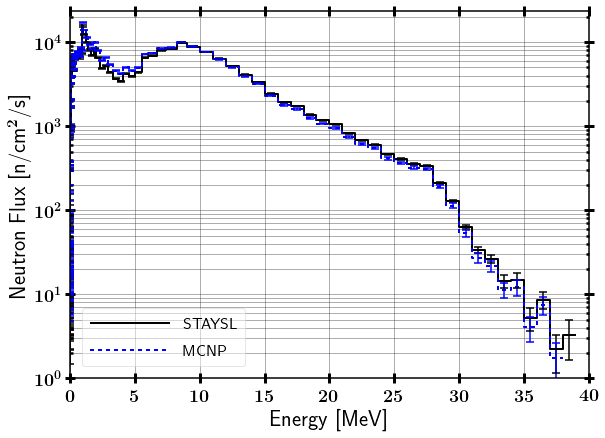

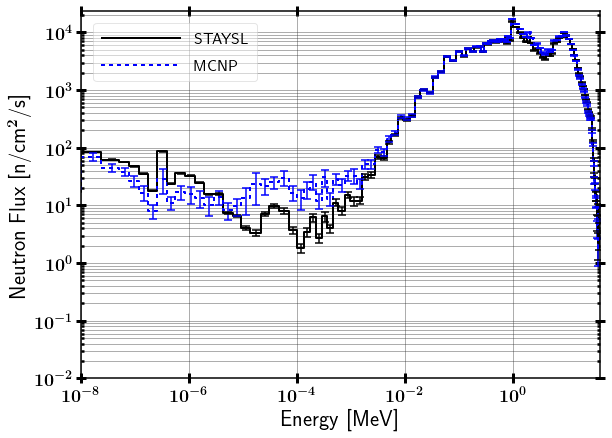

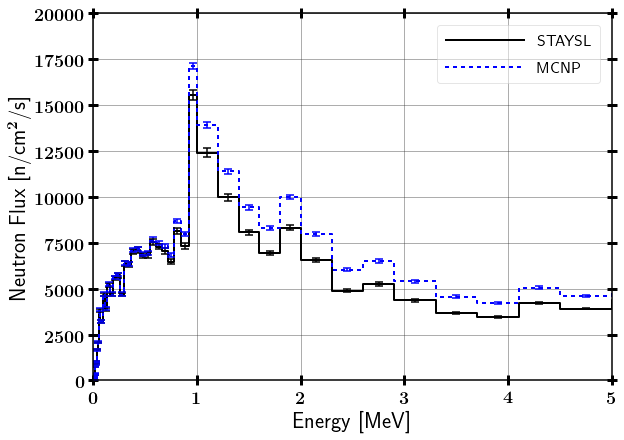

MCNP ETA Differential Flux = 8.445018e+09
STAYSL ETA Differential Flux = 1.960825e+10
Sim to Experimental Chi^2 = 2.2253574573e+17


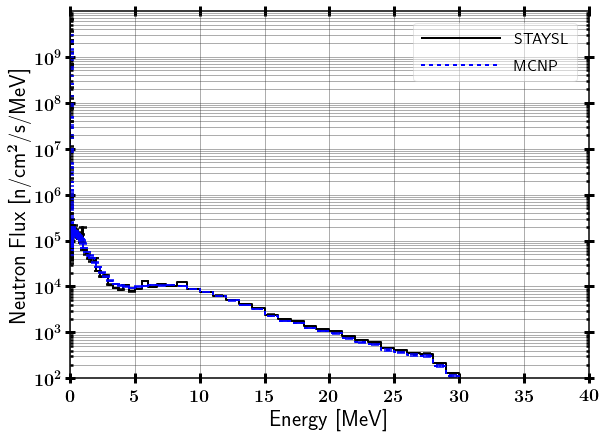

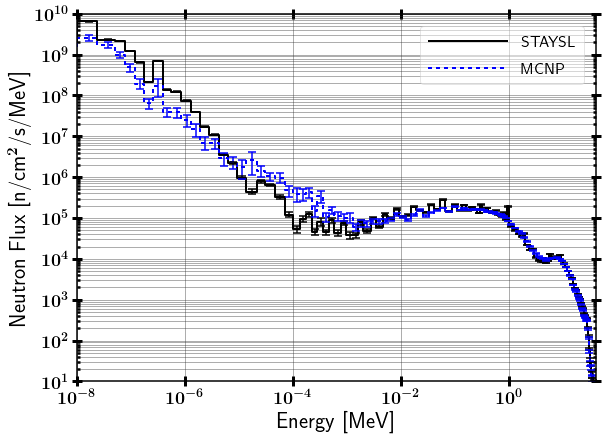

In [16]:
from DataAnalysis.Stats import red_chisq

iter = 0
iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                               uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                               edgeLoc='low', name='STAYSL')
iterFlux=Histogram()
iterFlux.build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                     uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                     edgeLoc='low', name='STAYSL')

iterDiff=Histogram()
iterDiff.build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjDiff'].tolist(),
                     uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjDiff']).tolist(),
                     edgeLoc='low', name='STAYSL')

# Plot flux comparison of MCNP simulation for ETA to STAYSL ETA unfold
print "MCNP ETA Flux = {:2e}".format(sum(phsTallyFrame['normTally']))
print "STAYSL ETA Flux = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterFlux.midPtData[:-1], 
                                                        mcnpPhsHisto.midPtData, 
                                                        standDev=iterFlux.sigma , freeParams=2))

iterFlux.plot(mcnpPhsHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              legendLoc=3, color=['k','b'], 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_flux_semilog')

iterFlux.plot(mcnpPhsHisto, xMin=1E-8, xMax=40, yMin=0.010, logX=True, logY=True, includeMarkers=False,
              legendLoc=2, color=['k','b'], 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_flux_log')

iterFlux.plot(mcnpPhsHisto, xMin=1E-6, xMax=5, yMax=20000, logX=False, logY=False, includeMarkers=False,
              legendLoc=1, color=['k','b'], 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_flux_lin')

# Plot differential fluxcomparison of MCNP simulation for ETA to STAYSL ETA unfold
print "MCNP ETA Differential Flux = {:2e}".format(sum(phsTallyFrame['normDiff']))
print "STAYSL ETA Differential Flux = {:2e}".format(sum(iterSoln[iter]._df['adjDiff']))

print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterDiff.midPtData[:-1], 
                                                        mcnpPhsDiffHisto.midPtData, 
                                                        standDev=iterDiff.sigma , freeParams=2))
iterDiff.plot(mcnpPhsDiffHisto, xMin=1E-6, xMax=40, yMin=100, logX=False, logY=True, includeMarkers=False,
                          legendLoc=1, color=['k','b'], 
                          xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/MeV]',
                          savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_differential_semilog')

iterDiff.plot(mcnpPhsDiffHisto, xMin=1E-8, xMax=40, yMin=10, logX=True, logY=True, includeMarkers=False,
                        legendLoc=1, color=['k','b'], 
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/MeV]',
                        savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_differential_log')

#iterDiff.plot(mcnpPhsDiffHisto, xMin=1E-6, xMax=40, yMin=100, logX=False, logY=False, includeMarkers=False,
#                        legendLoc=1, color=['k','b'], 
#                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/MeV]',
#                        savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_differential_lin')

MCNP ETA Lethargy Flux = 3.304842e+06
STAYSL ETA Lethargy Flux = 3.129850e+06
Sim to Experimental Chi^2 = 118236410.559


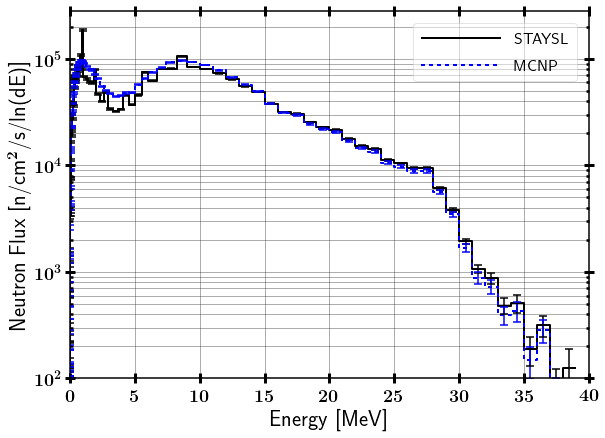

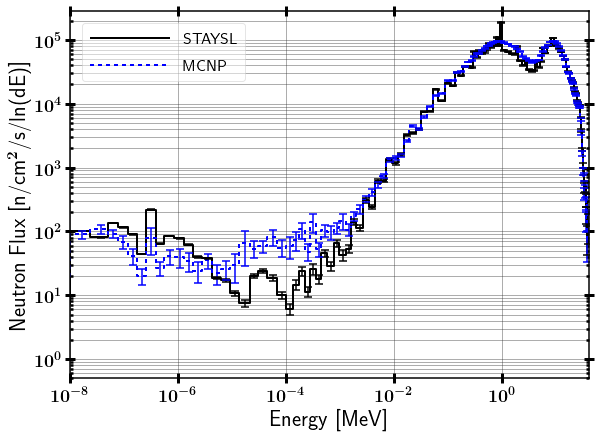

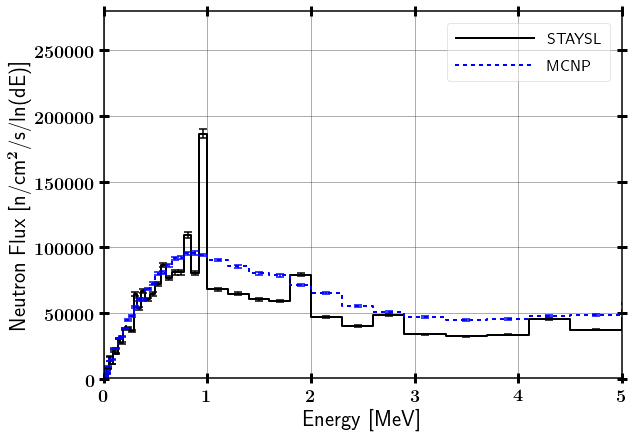

In [17]:
# Plot lethargy flux comparison of MCNP simulation for ETA to STAYSL ETA unfold
print "MCNP ETA Lethargy Flux = {:2e}".format(sum(phsTallyFrame['normLethargy']))
print "STAYSL ETA Lethargy Flux = {:2e}".format(sum(iterSoln[iter]._df['adjLethargy']))

print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterAdjHisto[iter].midPtData[:-1], 
                                                        mcnpPhsLethargyHisto.midPtData, 
                                                        standDev=iterAdjHisto[iter].sigma , freeParams=2))
iterAdjHisto[iter].plot(mcnpPhsLethargyHisto, xMin=1E-6, xMax=40, yMin=100, logX=False, logY=True, includeMarkers=False,
                          legendLoc=1, color=['k','b'], 
                          xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                          savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lethargy_semilog')

iterAdjHisto[iter].plot(mcnpPhsLethargyHisto, xMin=1E-8, xMax=40, yMin=0.5, logX=True, logY=True, includeMarkers=False,
                          legendLoc=2, color=['k','b'], 
                          xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                          savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lethargy_log')

iterAdjHisto[iter].plot(mcnpPhsLethargyHisto, xMin=1E-6, xMax=5, yMin=100, logX=False, logY=False, includeMarkers=False,
                          legendLoc=1, color=['k','b'], 
                          xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                          savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lethargy_lin')

In [18]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())

print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

In [19]:
from scipy.stats import pearsonr

print "Calculate pearson's correlation coefficient"
print "Lethargy: ", pearsonr(iterAdjHisto[iter].midPtData[1:-1],mcnpPhsLethargyHisto.midPtData[1:])
print "Differential: ", pearsonr(iterDiff.midPtData[1:-1],mcnpPhsDiffHisto.midPtData[1:])
print "Flux: ", pearsonr(iterFlux.midPtData[1:-1],mcnpPhsHisto.midPtData[1:])

from scipy.stats import ks_2samp

print "\nCalculate Kolmogorov-Smirnov 2 Sample Test"
print "Lethargy: ", ks_2samp(iterAdjHisto[iter].midPtData[1:-1],mcnpPhsLethargyHisto.midPtData[1:])
print "Differential: ", ks_2samp(iterDiff.midPtData[1:-1],mcnpPhsDiffHisto.midPtData[1:])
print "Flux: ", ks_2samp(iterFlux.midPtData[1:-1],mcnpPhsHisto.midPtData[1:])

from scipy.stats import anderson_ksamp

print "\nCalculate Anderson-Darling K Sample Test"
print "Lethargy: ", anderson_ksamp([iterAdjHisto[iter].midPtData[1:-1],mcnpPhsLethargyHisto.midPtData[1:]])
print "Differential: ", anderson_ksamp([iterDiff.midPtData[1:-1],mcnpPhsDiffHisto.midPtData[1:]])
print "Flux: ", anderson_ksamp([iterFlux.midPtData[1:-1],mcnpPhsHisto.midPtData[1:]])

from scipy.stats import linregress

print "\nCalculate Linear Regression"
print "Lethargy: ", linregress(iterAdjHisto[iter].midPtData[1:-1],mcnpPhsLethargyHisto.midPtData[1:])[2]**2
print "Differential: ", linregress(iterDiff.midPtData[1:-1],mcnpPhsDiffHisto.midPtData[1:])[2]**2
print "Flux: ", linregress(iterFlux.midPtData[1:-1],mcnpPhsHisto.midPtData[1:])[2]**2

from scipy.stats import chisquare

print "\nCalculate reduced Chi-Squared"
print "Lethargy: ", chisquare(iterAdjHisto[iter].midPtData[1:-1], f_exp=mcnpPhsLethargyHisto.midPtData[1:])
print "Differential: ", chisquare(iterDiff.midPtData[1:-1], f_exp=mcnpPhsDiffHisto.midPtData[1:])
print "Flux: ", chisquare(iterFlux.midPtData[1:-1], f_exp=mcnpPhsHisto.midPtData[1:])

print "\n\nAbove 10 keV:"

print "\nCalculate Kolmogorov-Smirnov 2 Sample Test"
print "Lethargy: ", ks_2samp(iterAdjHisto[iter].midPtData[41:-1],mcnpPhsLethargyHisto.midPtData[41:])
print "Differential: ", ks_2samp(iterDiff.midPtData[41:-1],mcnpPhsDiffHisto.midPtData[41:])
print "Flux: ", ks_2samp(iterFlux.midPtData[41:-1],mcnpPhsHisto.midPtData[41:])

Calculate pearson's correlation coefficient
Lethargy:  (0.94892770999515597, 1.8919758939288241e-59)
Differential:  (0.96643543369548524, 1.0231853484722377e-69)
Flux:  (0.99616334663603567, 1.6249299032266795e-123)

Calculate Kolmogorov-Smirnov 2 Sample Test
Lethargy:  Ks_2sampResult(statistic=0.094017094017094016, pvalue=0.65797441136045187)
Differential:  Ks_2sampResult(statistic=0.068376068376068411, pvalue=0.93958726602151987)
Flux:  Ks_2sampResult(statistic=0.11111111111111113, pvalue=0.44316537549872737)

Calculate Anderson-Darling K Sample Test
Lethargy:  Anderson_ksampResult(statistic=0.22259235250860393, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.2765189909843815)
Differential:  Anderson_ksampResult(statistic=-1.0424065543047616, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=1.0582987129941317)
Flux:  Anderson_ksampResult(statistic=0.0023176915551980132, critical_values=array([ 0.325,  1.226,  1.

C:\Users\James\Anaconda2\lib\site-packages\scipy\stats\morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [13]:
import numpy as np
import pandas as pd
#------------------------------------------------------------------------------#
def plot_staysl_corr_mat(path):
    """!
    Reads the STAYSL output and plot a covariance matrix.

    @param path: <em> sting </em> \n
        The path to the STAYSL output file. \n
    """

    corrData = False
    linenum = 0
    corrMat = []
    try:
        f = open(path+'stayslin.out', 'r')
        for line in f:
            spltLine = line.strip().split()
            
            if corrData:
                if len(spltLine) > 1:
                    if int(spltLine[0])==linenum+1 and int(spltLine[1])==1000:
                        corrMat.append(map(int, spltLine[1:]))
                        if linenum != 0 and len(corrMat[linenum-1]) != 140:
                            for i in range(140-len(corrMat[linenum-1])):
                                corrMat[linenum-1].insert(0, 0)
                        linenum += 1
                    else:
                        corrMat[linenum-1].extend(map(int, spltLine))
                elif len(spltLine) == 1:
                    corrMat[linenum-1].extend(map(int, spltLine))
                elif len(spltLine) == 0:
                    corrData = False
            if line[0:30] == "  OUTPUT FLUX REL. CORRELATION":
                corrData = True
                
        # convert to an array
        #corrMat = np.asarray(corrMat)
        corrMat = pd.DataFrame(corrMat)
        corrMat = corrMat/1000.
        corrMat = corrMat.drop(corrMat.index[119:])
        corrMat = corrMat.drop(corrMat.columns[119:], axis=1)
        
        # Close the file
        f.close()
        
    except IOError as e:
            print "I/O error({0}): {1}".format(e.errno, e.strerror)


    return corrMat
corrMat = plot_staysl_corr_mat("C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/")

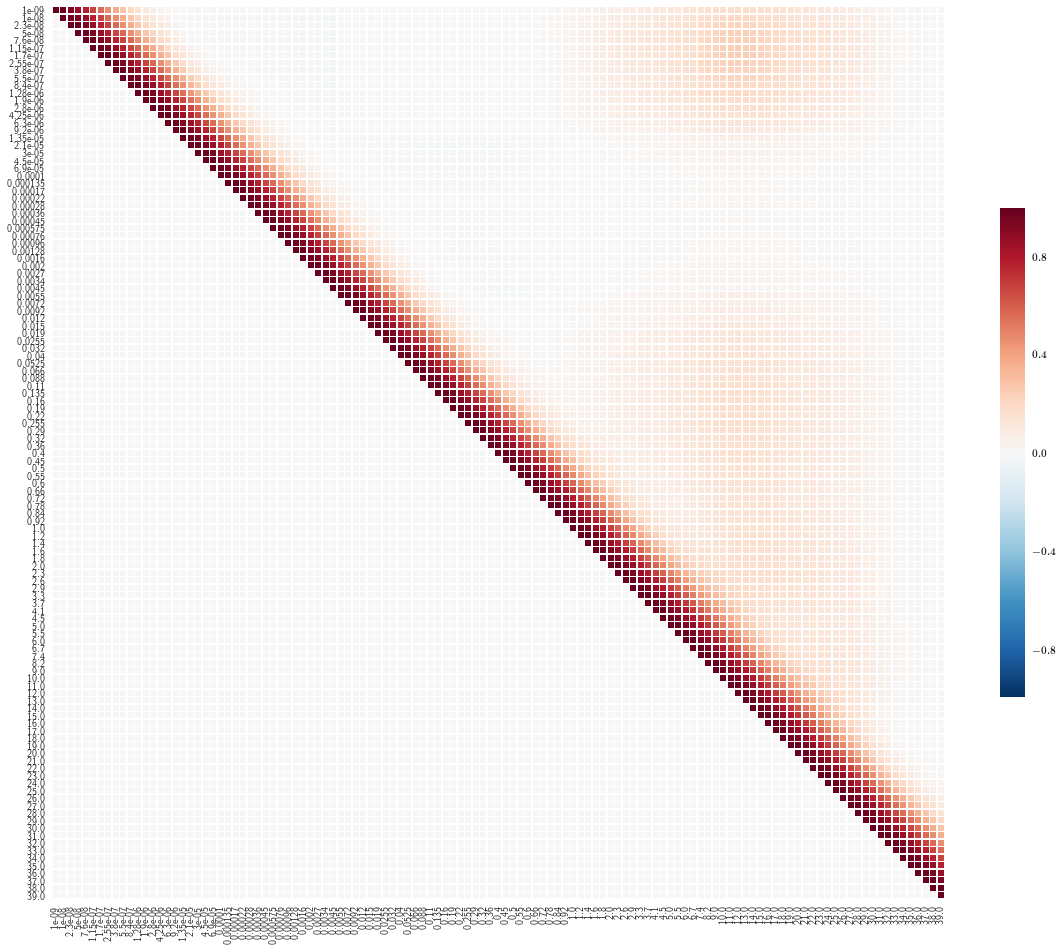

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

corrMat = corrMat.rename(phsTallyFrame['bin'])
corrMat = corrMat.rename(columns=phsTallyFrame['bin'])

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMat, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [15]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 0.01953, Std Norm = 5.7667066173
Chi^2 = 0.01949
Std Norm = 5.60376404214, 5.67974973832


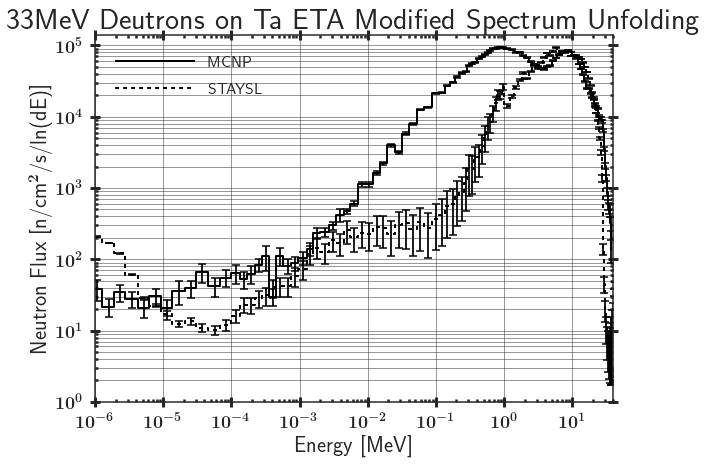

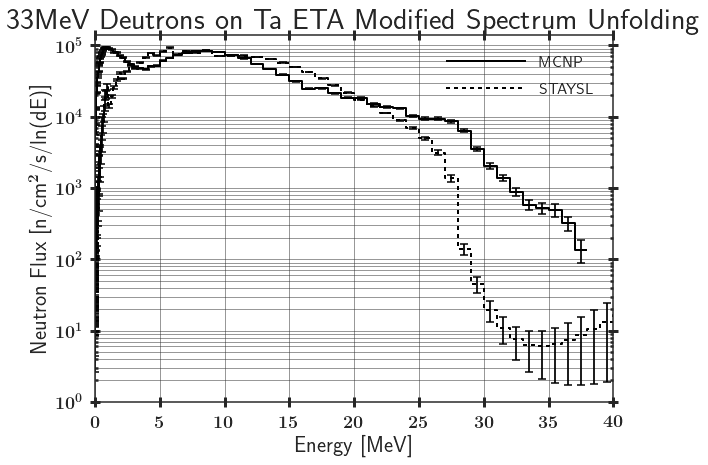

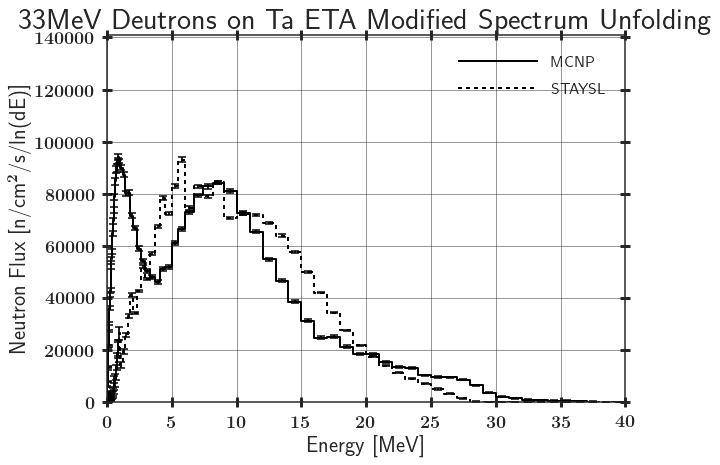

In [16]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL')

mcnpPhsLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]', legendLoc=2)
mcnpPhsLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')
mcnpPhsLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=False, logY=False, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio')
#              #savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))